In [1]:
#

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
dataset_path = '/kaggle/input/real-estate-data-uae/uae_properties.csv'
uae_properties = pd.read_csv(dataset_path)



/kaggle/input/real-estate-data-uae/uae_properties.csv


In [2]:
uae_properties.head()

,id,title,displayAddress,bathrooms,bedrooms,addedOn,type,rera,propertyType,price
0,10837871,★ EXCLUSIVE RELEASE ★ | LUXURY 3 BED FLAT | GO...,"Sobha One, Sobha Hartland, Mohammed Bin Rashid...",2,3,2024-01-06T17:05:24+00:00,buy,8.171857e+08,apartment,3950000
1,10880180,"★ BUY NOW 624,000AED ★ (20% FIRST PAYMENT + 4%...","Sobha Verde, Jumeirah Lake Towers, Dubai",2,3,2024-01-13T21:19:31+00:00,buy,8.171857e+08,apartment,2600000
2,11220200,GREEN HEART OF DUBAI |URBAN DESIGN | LUXURY LI...,"Park Horizon, Dubai Hills Estate, Dubai",2,3,2024-03-12T03:18:54+00:00,buy,2.125966e+09,apartment,3450000
3,11176502,Prime Location | Corner Spacious Unit | Bright...,"AZIZI Riviera, Meydan One, Meydan, Dubai",2,3,2024-03-04T06:53:51+00:00,buy,7.114978e+10,apartment,2000000
4,11179908,Very Limited | Ideal For Investment | 40% Disc...,"Verdana, Dubai Investment Park, Dubai",2,0,2024-03-04T13:24:39+00:00,buy,4.652616e+08,apartment,284000


In [3]:
uae_properties.tail()

,id,title,displayAddress,bathrooms,bedrooms,addedOn,type,rera,propertyType,price
487,11221319,Best Offer | Limited 3 Bed | Furnished Serviced,"North 43 Residences, Jumeirah Village Circle, ...",2,3,2024-03-12T08:31:25+00:00,buy,4.560277e+08,apartment,1914927
488,10837884,LUXURY FLAT | GOLDEN VISA | GREAT VIEW | FLEXI...,"Sobha Verde, Jumeirah Lake Towers, Dubai",2,3,2024-01-06T17:09:49+00:00,buy,8.171857e+08,apartment,2650000
489,11134630,Magnificent| Luxurious l High ROI,"310 Riverside Crescent, Sobha Hartland II, Moh...",2,3,2024-02-26T06:31:21+00:00,buy,1.733539e+08,apartment,2191944
490,11151144,Full Burj Khalifa | High Floor | Confirm Seller,"Boulevard Point, Downtown Dubai, Dubai",2,3,2024-02-28T07:11:49+00:00,buy,6.512528e+09,apartment,6600000
491,10615925,Invest in this Modern Unit For Your Family!,"Ansam 1, Ansam, Yas Island, Abu Dhabi",2,0,2023-11-22T09:40:55+00:00,buy,NaN,apartment,850000


In [4]:
#define list of cities within the dataset

known_cities = ["Dubai", "Abu Dhabi", "Sharjah", "Ajman", "Ras Al Khaimah", "Fujairah", "Umm Al Quwain", "Al Ain"]

#extract city from displayadress field

def extract_city(address):
    for city in known_cities:
        if city in address:
            return city
    return "Uknown"

#apply the function to the 'displayAddress' column to create a new 'city' column
uae_properties['city'] = uae_properties['displayAddress'].apply(extract_city)

#Check distribution of cities across all entries
city_distribution = uae_properties['city'].value_counts() 

city_distribution
                                   

city
Dubai             307
Abu Dhabi         122
Sharjah            43
Ras Al Khaimah     14
Ajman               6
Name: count, dtype: int64

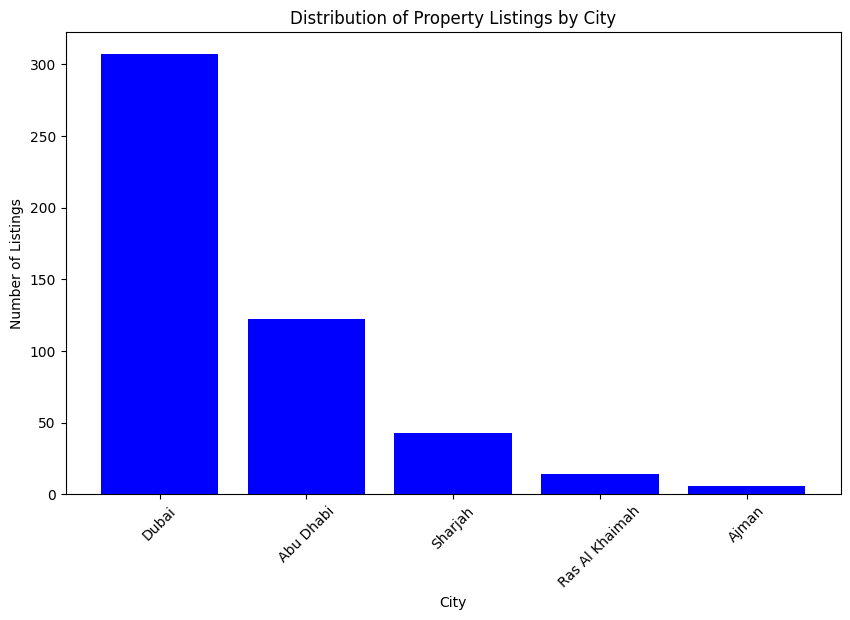

In [5]:
# Data preparation: Define the names of the cities and the corresponding number of listings for each city
cities = ["Dubai", "Abu Dhabi", "Sharjah", "Ras Al Khaimah", "Ajman"]  # City names
listings = [307, 122, 43, 14, 6]  # Number of listings per city

# Plotting: Create a bar plot to visualize the distribution of listings across cities
plt.figure(figsize=(10, 6))  # Initialize a figure with a custom size (width, height) in inches
plt.bar(cities, listings, color='blue')  # Plot bars with 'cities' on the x-axis and 'listings' on the y-axis, colored sky blue

# Adding plot aesthetics: Title, axis labels, and x-axis tick rotation for readability
plt.title('Distribution of Property Listings by City')  # Set the title of the plot
plt.xlabel('City')  # Label the x-axis as 'City'
plt.ylabel('Number of Listings')  # Label the y-axis as 'Number of Listings'
plt.xticks(rotation=45)  # Rotate the x-axis labels (city names) by 45 degrees to prevent overlap and improve readability

# Display the plot: Render the bar plot on the screen
plt.show()  # Show the plot in the output cell of the notebook

First few rows of the dataset:
         id                                              title  \
0  10837871  ★ EXCLUSIVE RELEASE ★ | LUXURY 3 BED FLAT | GO...   
1  10880180  ★ BUY NOW 624,000AED ★ (20% FIRST PAYMENT + 4%...   
2  11220200  GREEN HEART OF DUBAI |URBAN DESIGN | LUXURY LI...   
3  11176502  Prime Location | Corner Spacious Unit | Bright...   
4  11179908  Very Limited | Ideal For Investment | 40% Disc...   

                                      displayAddress  bathrooms  bedrooms  \
0  Sobha One, Sobha Hartland, Mohammed Bin Rashid...          2         3   
1           Sobha Verde, Jumeirah Lake Towers, Dubai          2         3   
2            Park Horizon, Dubai Hills Estate, Dubai          2         3   
3           AZIZI Riviera, Meydan One, Meydan, Dubai          2         3   
4              Verdana, Dubai Investment Park, Dubai          2         0   

                     addedOn type          rera propertyType    price   city  
0  2024-01-06T17:05:24+00:00  

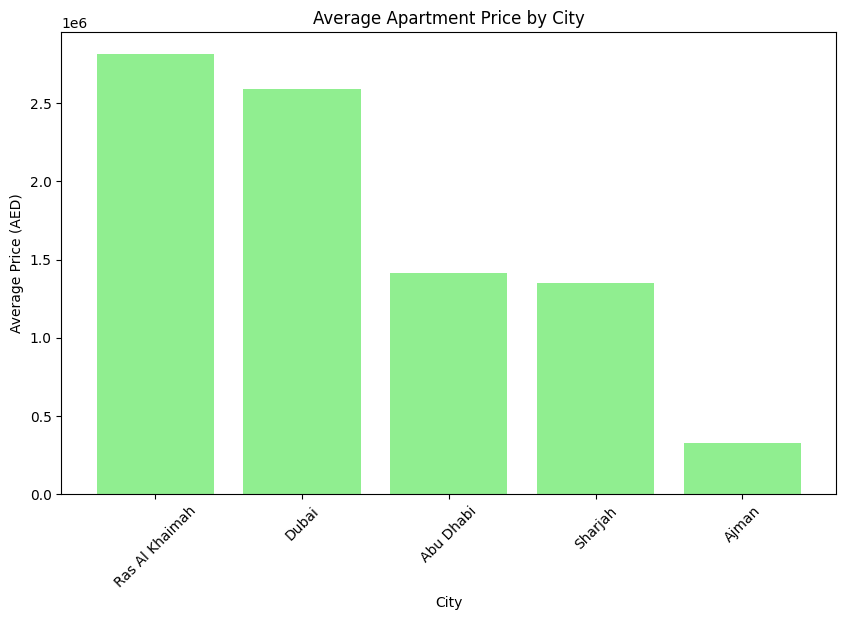

In [6]:
# Initial Data Exploration
print("First few rows of the dataset:")
print(uae_properties.head())  # Display the first few rows of the dataset

print("\nMissing Values Check:")
print(uae_properties.isnull().sum())  # Check for missing values in each column

print("\nData Types:")
print(uae_properties.dtypes)  # Check the data types of each column

# Descriptive Statistics
print("\nDescriptive Statistics for Price:")
print(uae_properties['price'].describe())  # Get descriptive statistics for the 'price' column

# City-wise Price Analysis
city_price_avg = uae_properties.groupby('city')['price'].mean().sort_values(ascending=False)  # Calculate the average price per city and sort them
print("\nAverage Price by City:")
print(city_price_avg)

# Bar Plot Visualization for Average Price by City
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(city_price_avg.index, city_price_avg.values, color='lightgreen')  # Create a bar plot with city names on the x-axis and average prices on the y-axis
plt.title('Average Apartment Price by City')  # Title of the plot
plt.xlabel('City')  # X-axis label
plt.ylabel('Average Price (AED)')  # Y-axis label
plt.xticks(rotation=45)  # Rotate the city names for better visibility
plt.show()  # Display the plot

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


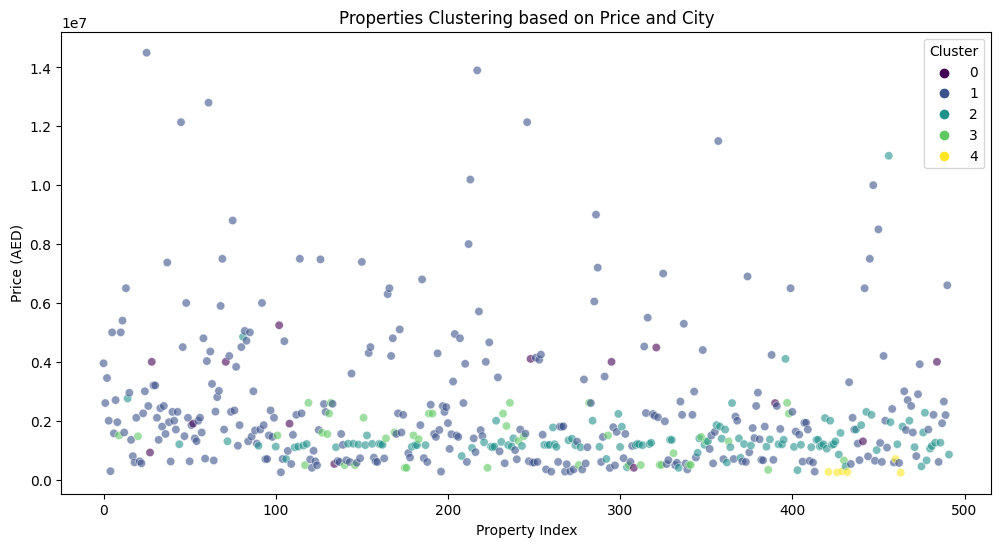

In [7]:
#K means clustering for city and pricing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns



# One-hot encode the 'city' column
city_dummies = pd.get_dummies(uae_properties['city'])

# Prepare features for clustering
features = pd.concat([uae_properties[['price']], city_dummies], axis=1)

# Standardize the features (important for clustering)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Choosing 5 clusters for demonstration
clusters = kmeans.fit_predict(features_scaled)

# Adding cluster information to the dataset
uae_properties['Cluster'] = clusters

# Visualizing Clusters with a Scatter Plot
# For visualization, we'll plot the original prices against the index of properties,
# colored by their cluster. This isn't a direct 'city vs. price' plot due to the multi-dimensional nature of the data,
# but it can still provide insights into how properties are grouped.
plt.figure(figsize=(12, 6))
sns.scatterplot(x=uae_properties.index, y='price', hue='Cluster', data=uae_properties, palette='viridis', alpha=0.6, legend="full")
plt.title('Properties Clustering based on Price and City')
plt.xlabel('Property Index')
plt.ylabel('Price (AED)')
plt.legend(title='Cluster')
plt.show()


# 📊 Main Findings:
* 🏠 Dataset Composition: The dataset features property listings in the UAE, detailing ID, title, address, bathrooms, bedrooms, listing date, type, RERA number, property type, price, and city.
* ❗ Missing Data: There are 169 missing entries in the RERA column, indicating some listings lack regulatory information.
* 🔢 Data Types: The dataset comprises numerical (int64, float64) and categorical (object) data types, accommodating a wide range of analyses.
* 📈 Number of Listings: A total of 492 property listings are included in the dataset.
* 💰 Price Range: Property prices vary significantly, ranging from 233,000 AED to 14,500,000 AED.
* 💹 Average Price: The mean price of the properties is approximately 2.17 million AED, with a median price of 1.499 million AED, suggesting a skewed distribution.
* 🌆 City Insights: Ras Al Khaimah and Dubai showcase the highest average property prices at approximately 2.81 million AED and 2.59 million AED, respectively. Abu Dhabi, Sharjah, and Ajman follow, with Ajman offering the most affordable options.
#  💡 Recommendations:
* 📊 In-depth Analysis: Further analysis is recommended to explore the factors contributing to the high variability in property prices, particularly in Ras Al Khaimah and Dubai.
* 🔍 Data Enrichment: Additional data, such as property size, amenities, and proximity to key locations, could enhance the analysis and provide more accurate predictions.
* 📅 Temporal Analysis: Investigating price trends over time may reveal valuable insights into market dynamics and investment opportunities.
* 🌍 Geographical Analysis: If available, latitude and longitude data could facilitate a detailed geographical analysis to understand the spatial distribution of property prices.
* 🔢 Increase Data Volume: Expanding the dataset with more listings could improve analysis robustness, especially for machine learning model training and validation.